**Desafio: adicione o seu estado aos 5 estados existentes no plot.**
**Plus: Eliminar o período no inicio da serie para melhorar a escala da análise**.

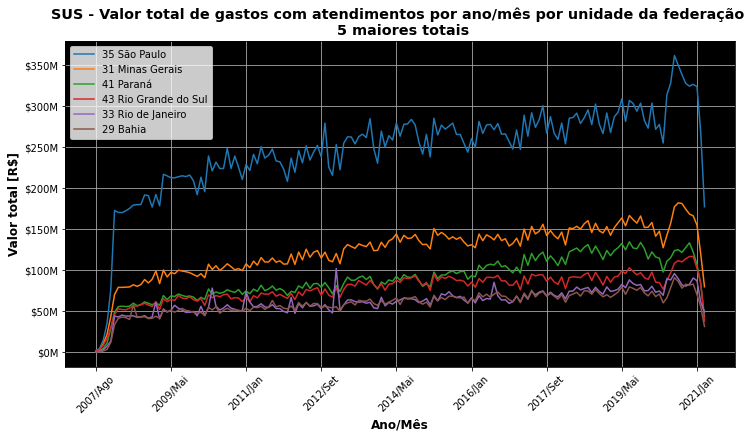

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

dados = pd.read_csv("/content/A213524189_28_143_208.csv", encoding="ISO-8859-1", skiprows=3, sep=";", skipfooter=12, 
                    thousands=".", decimal=",", engine='python')

colunas_usaveis = dados.mean().index.tolist()
colunas_usaveis.insert(0, "Unidade da Federação")
usaveis = dados[colunas_usaveis]
usaveis = usaveis.set_index("Unidade da Federação")

ordenado_por_total = usaveis.sort_values("Total", ascending=False)#ordena
ordenado_por_total = ordenado_por_total.drop("Total",axis=1)#retira coluna Total
top5_mais1 = ordenado_por_total.head()#somente os 5 maiores gastos

#inclui sexto estado - Bahia, estado com maior populacao no Nordeste
top5_mais1 = top5_mais1.append(ordenado_por_total.loc['29 Bahia'])

#retira pico máximo para ajustar a escala
top5_mais1 = top5_mais1.drop(top5_mais1.loc['35 São Paulo'].idxmax(),axis=1)

ax = top5_mais1.T.plot(figsize=(12,6))

#ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("${x:,.2f}M"))
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '${:,.0f}M'.format(x/1000000)))
ax.set_facecolor('black')

plt.legend(loc="upper left")
plt.title('SUS - Valor total de gastos com atendimentos por ano/mês por unidade da federação \n 5 maiores totais', weight='bold', fontsize='x-large' )
plt.xlabel("Ano/Mês",weight='bold',fontsize='large')
plt.ylabel("Valor total [R$]",weight='bold',fontsize='large')
plt.xticks(rotation=45)
plt.grid()
plt.show()